In [1]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Lasso Regression, which stands for Least Absolute Shrinkage and Selection Operator, is a type of linear regression that uses shrinkage. Shrinkage here means that the data values are shrunk towards a central point, like the mean. The lasso technique encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

### Key Features of Lasso Regression:

1. **Regularization Term**: The key characteristic of Lasso Regression is that it adds an L1 penalty to the regression model, which is the absolute value of the magnitude of the coefficients. The cost function for Lasso regression is:

   $$ \text{Minimize } \sum_{i=1}^{n} (y_i - \sum_{j=1}^{p} x_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$

   where $ \lambda $ is the regularization parameter.

2. **Feature Selection**: One of the advantages of lasso regression over ridge regression is that it can result in sparse models with few coefficients; some coefficients can become exactly zero and be eliminated from the model. This property is called automatic feature selection and is a form of embedded method.

3. **Parameter Tuning**: The strength of the L1 penalty is determined by a parameter, typically denoted as alpha or lambda. Selecting a good value for this parameter is crucial and is typically done using cross-validation.

4. **Bias-Variance Tradeoff**: Similar to ridge regression, lasso also manages the bias-variance tradeoff in model training. Increasing the regularization strength increases bias but decreases variance, potentially leading to better generalization on unseen data.

5. **Scaling**: Before applying lasso, it is recommended to scale/normalize the data as lasso is sensitive to the scale of input features.

### Implementation in Scikit-Learn:

Lasso regression can be implemented using the `Lasso` class from Scikit-Learn's `linear_model` module. Here's a basic example:

In [3]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some regression data
X, y = make_regression(n_samples=1000, n_features=15, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression object
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

# Fit the model
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
# Evaluate the model 
print("Lasso Mean Squared Error: ", mean_squared_error(y_test, y_pred_lasso))
print("Ridge Mean Squared Error: ", mean_squared_error(y_test, y_pred_ridge))


Lasso Mean Squared Error:  9.387744740461203
Ridge Mean Squared Error:  0.05090866185224682


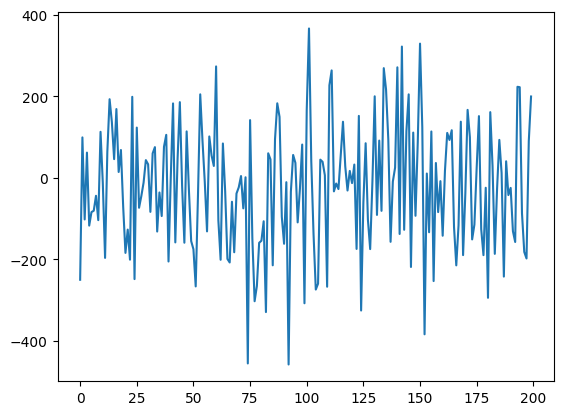

In [5]:
#Now lets try to plot these results
import matplotlib.pyplot as plt
import numpy as np
#Compare the results 
plt.plot(y_test, label='True')


In [7]:
# Fine tune alpha value using cv
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a Lasso regression object
lasso = Lasso()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.1)}

# Use grid search to find the best value for alpha
lasso_cv = GridSearchCV(lasso, param_grid, cv=10)

# Fit the model
lasso_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

# Create a Ridge regression object
ridge = Ridge()

# Create a dictionary for the grid search key and values
param_grid = {'alpha': np.arange(1, 10, 0.1)}

# Use grid search to find the best value for alpha
ridge_cv = GridSearchCV(ridge, param_grid, cv=10)

# Fit the model
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': 1.0}
Best score is 0.9995685234915115
Tuned Ridge Regression Parameters: {'alpha': 1.0}
Best score is 0.9999981195099323
